In [2]:
import simulationlib as sl
import lasinglib as ll
import measurelib as ml
%matplotlib widget
import annealing_database2 as adb2

import modulators as mo

import shapes

import numpy as np
import matplotlib.pyplot as plt

import logging
import os

print(os.getcwd())


DBPATH = r".\annealing records\50um Al ASB New Database\50um Al ASB.dill"
database = adb2.DatabaseWrapper(DBPATH)
# print(database.get_diff())

# write directly to TAP directory...
TAP_dbpath = r"C:\Users\ssuub\Desktop\MPSD-TAP\TAPV-2\Application\pythonFiles\DataTextFiles"
PULSE_PROFILING_LOCATION = (24, 27)

C:\Users\ssuub\Desktop\Damage analysis\EDET80k_Damage\Lasing Analysis\apps\Simulation and BeamLib


In [3]:
# This works for most sequences and is reasonably fast to simulate
CHIP = sl.SimGrid(dimension=32, resolution=101, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

SILICON = sl.Material(diffusivity=88, emissivity=0.09, specific_heat=0.7, density=0.002329002)

# 19.9.2024 actually usable coord area with a reasonable fraction of full intensity:
# this is due to bad calibration
# x_domain = [2.5, 32.5] # x = 2.5 should be xmin = 1, x=32.5 should be xmax = 31
# y_domain = [-4, 26] # y = -4 should be ymin = 1, y = 26 should by ymax = 31

PULSE_PROFILING_LOCATION = (24, 27)

# make sure these line up with the ones declared in TAP's settings; these are used to zero edges out better.
CENTERING_OFFSETS = (-2, -1.5)

LaserSequence(['Pulse(4.000W, 0.000 + 0.500S -> 0.500NOMOD)', 'Pulse(4.000W, 1.000 + 0.500S -> 1.500NOMOD)', 'Pulse(4.000W, 2.000 + 0.500S -> 2.500NOMOD)', 'Pulse(4.000W, 3.000 + 0.500S -> 3.500NOMOD)', 'Pulse(4.000W, 4.000 + 0.500S -> 4.500NOMOD)', 'Pulse(4.000W, 5.000 + 0.500S -> 5.500NOMOD)', 'Pulse(4.000W, 6.000 + 0.500S -> 6.500NOMOD)', 'and 144 additional pulse(s).']) 1


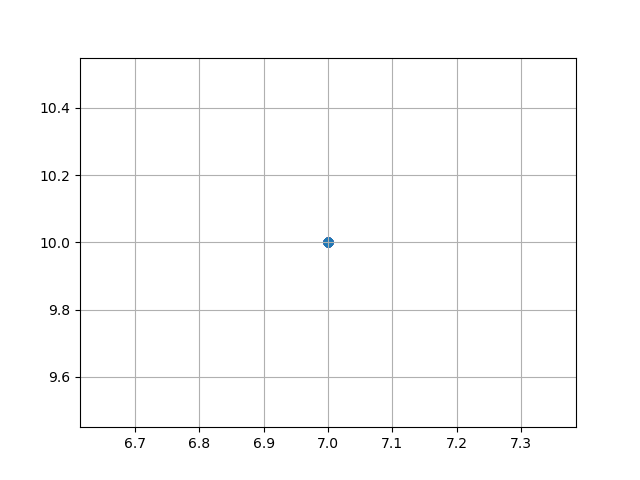

In [19]:
# Design your annealing cycle here

pulses = []

average_output = 2 # W

numpulses = 150
x, y = 7, 10
power = 4 # W
duration = 0.5

delay = ((power * duration) / average_output) - duration

notes=f"{numpulses}x 4W 0.5s preheat to 32C, Tmax '28C-28.5C'"

pulses.append(ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=(x, y), power=power, sigma=ll.DEFAULT_LASER_SIGMA))

seq = ll.LaserSequence(pulses*numpulses, start_time=0, delay=delay)


seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

In [ ]:
# simulate sequence if desired

sim = sl.Simulation(CHIP, SILICON, duration=seq.duration + 4, pulses=[seq], ambient_temp=300,
                    starting_temp=300, neumann_bc=False,
                    edge_derivative=0, sample_framerate=24, intended_pbs=1,
                    dense_logging=False, timestep_multi=0.75, radiation=True, progress_bar=True, silent=False)

sim.simulate()

In [ ]:
# animate
from IPython.display import HTML
ani = sim.animate(cmap="magma")
plt.close()
# use plt.show() for more rigorous examinations
HTML(ani.to_jshtml())

In [20]:
# write seq to TAP cy     lk  cle code
seq.write_to_cycle_code(TAP_dbpath + "/michaeltest1.txt", 0.03, *CENTERING_OFFSETS)

In [21]:
# If you have actually fired this pattern on the chip, save it to the annealing database record!
database.write_sequence(seq, notes=notes)

CSV modified


CSV modified


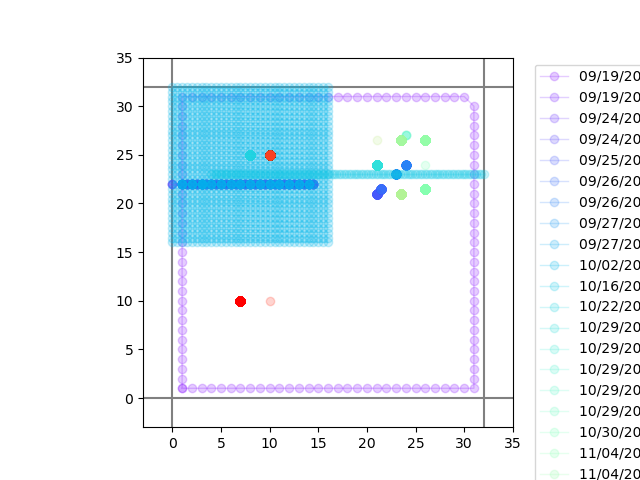

In [18]:
# view the current database entries
database.visualize()

In [ ]:
# backup database
database.backup(note="pre-commit")

In [ ]:
print(database.get_record())

In [ ]:
import position_voltage_converter as pvcs
import numpy

def patch_asscalar(a):
    return a.item()

setattr(numpy, "asscalar", patch_asscalar)
print(pvcs.voltage_from_position(23.5 - 2, 21 - 1.5))
pvcs.position_from_voltage(1.301, 2.851, account_for_outer_ring=False)